In [32]:
import pandas as pd
import yfinance as yf
from bs4 import BeautifulSoup
import requests
import plotly.graph_objects as go
from plotly.subplots import make_subplots

## Question 1 - Extracting Tesla Stock Data Using yfinance

In [3]:
tesla = yf.Ticker("TSLA")
tesla_stocks = tesla.history(period="max")
tesla_stocks.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


## Question 2 - Extracting Tesla Revenue Data Using Webscraping


In [5]:
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm"
web_tesla = requests.get(url).text
soup = BeautifulSoup(web_tesla, "html.parser")

In [28]:
tesla_revenue = pd.DataFrame(columns = ["Date","Revenue"])
for row in soup.find("tbody").find_all("tr"):
    col = row.find_all("td")
    date = col[0].text
    reve = col[1].text
    temp = pd.DataFrame({"Date":[date],"Revenue":[reve]})
    tesla_revenue = pd.concat([tesla_revenue,temp],ignore_index = True)

tesla_revenue["Revenue"] = tesla_revenue["Revenue"].str.replace("$","")
tesla_revenue["Revenue"] = tesla_revenue["Revenue"].str.replace(",","")
tesla_revenue.tail()


,Date,Revenue
11,2009,8806
12,2008,7094
13,2007,5319
14,2006,3092
15,2005,1843


## Question 3 - Extracting GameStop Stock Data Using yfinance

In [8]:
gamestop = yf.Ticker("GME")
gme_stocks = gamestop.history(period="max")
gme_stocks.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2002-02-13 00:00:00-05:00,1.620128,1.693350,1.603296,1.691667,76216000,0.0,0.0
2002-02-14 00:00:00-05:00,1.712707,1.716074,1.670626,1.683251,11021600,0.0,0.0
2002-02-15 00:00:00-05:00,1.683250,1.687458,1.658002,1.674834,8389600,0.0,0.0
2002-02-19 00:00:00-05:00,1.666418,1.666418,1.578047,1.607504,7410400,0.0,0.0
2002-02-20 00:00:00-05:00,1.615920,1.662210,1.603296,1.662210,6892800,0.0,0.0


## Question 4 - Extracting GameStop Revenue Data Using Webscraping

In [10]:
url = " https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html"
web_gme = requests.get(url).text
soup = BeautifulSoup(web_gme, "html.parser")

In [30]:
gme_revenue = pd.DataFrame(columns = ["Date","Revenue"])
for row in soup.find("tbody").find_all("tr"):
    col = row.find_all("td")
    date = col[0].text
    reve = col[1].text
    gme_revenue = pd.concat([gme_revenue,pd.DataFrame({"Date":[date],"Revenue":[reve]})],ignore_index = True)

gme_revenue['Revenue'] = gme_revenue['Revenue'].str.replace("$","")
gme_revenue['Revenue'] = gme_revenue['Revenue'].str.replace(",","")
gme_revenue.tail()

,Date,Revenue
11,2009,8806
12,2008,7094
13,2007,5319
14,2006,3092
15,2005,1843


## Question 5 - Tesla Stock and Revenue Dashboard

In [38]:
def make_graph(stock_data, revenue_data, stock):
    fig = make_subplots(rows=2, cols=1, shared_xaxes=True, subplot_titles=("Historical Share Price", "Historical Revenue"), vertical_spacing = .3)
    stock_data_specific = stock_data[stock_data.Date <= '2021-06-14']
    revenue_data_specific = revenue_data[revenue_data.Date <= '2021-04-30']
    fig.add_trace(go.Scatter(x=pd.to_datetime(stock_data_specific.Date ), y=stock_data_specific.Close.astype("float"), name="Share Price"), row=1, col=1)
    fig.add_trace(go.Scatter(x=pd.to_datetime(revenue_data_specific.Date), y=revenue_data_specific.Revenue.astype("float"), name="Revenue"), row=2, col=1)
    fig.update_xaxes(title_text="Date", row=1, col=1)
    fig.update_xaxes(title_text="Date", row=2, col=1)
    fig.update_yaxes(title_text="Price ($US)", row=1, col=1)
    fig.update_yaxes(title_text="Revenue ($US Millions)", row=2, col=1)
    fig.update_layout(showlegend=False,
    height=900,
    title=stock,
    xaxis_rangeslider_visible=True)
    fig.show()

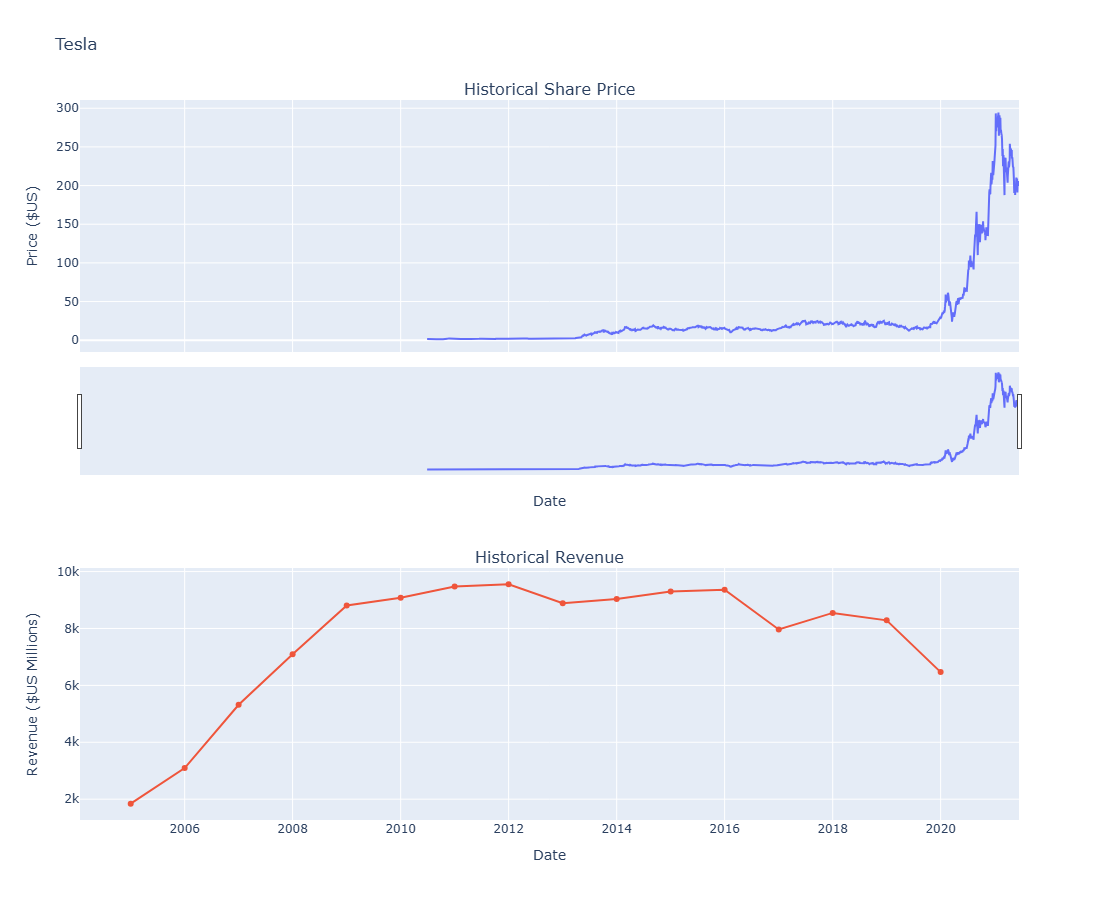

In [40]:
tesla_stocks.reset_index(inplace = True)
make_graph(tesla_stocks,tesla_revenue,"Tesla")

## Question 6 - GameStop Stock and Revenue Dashboard

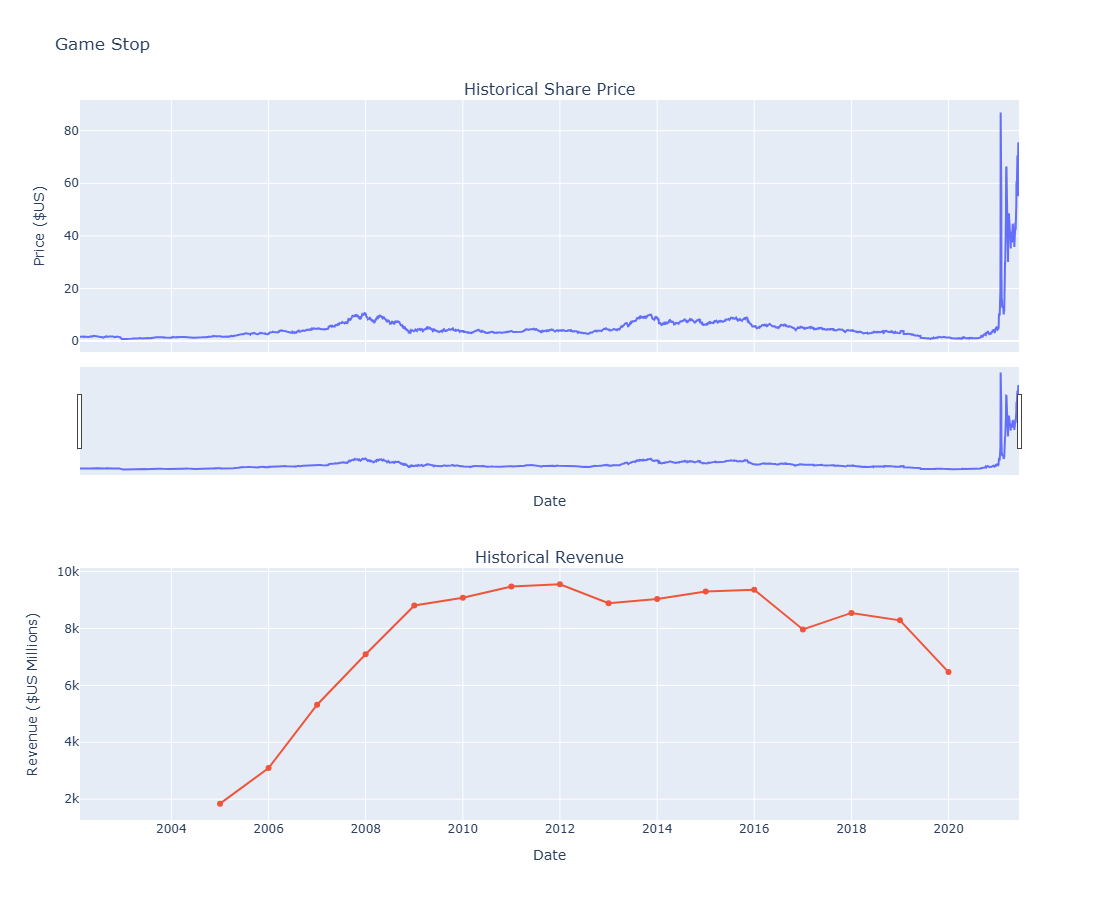

In [42]:
gme_stocks.reset_index(inplace=True)
make_graph(gme_stocks,gme_revenue, "Game Stop")